In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM  # importing layers package , Dense layer is used to connect all layers
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [3]:
import pandas_datareader as data

In [4]:
df = pd.read_csv("C:\\Users\\goelp\\Desktop\\SCIT Classroom material\\ASSIGNMENTS DONE BY ME\\Finance\\DLF PE.csv")

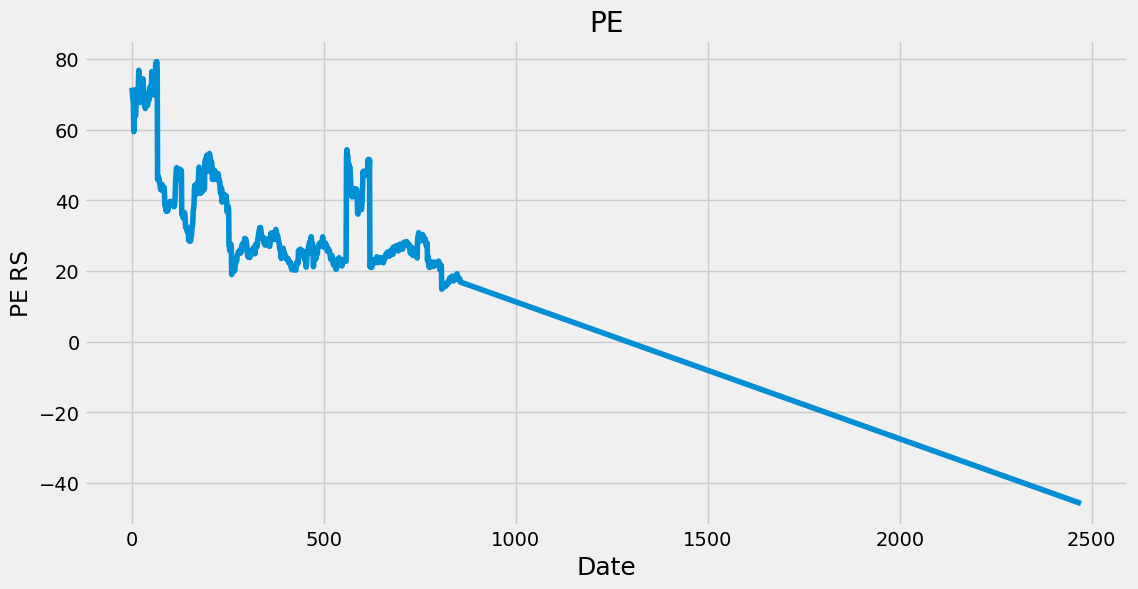

In [6]:
plt.figure(figsize=(12,6))
plt.title('PE')
plt.plot(df['PE'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('PE RS')
plt.show()

In [9]:
data = df.filter(['PE'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.80)  #Math. ceil() method rounds a number rounded UP to the nearest integer.
training_data_len

1979

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[ 2.46124167],
       [ 2.43795711],
       [ 2.3698674 ],
       ...,
       [-1.68698901],
       [-1.6883561 ],
       [-1.68972319]])

In [11]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(120, len(train_data)):
    x_train.append(train_data[i-70:i,0])
    y_train.append(train_data[i,0])
    if i <= 70:
        print(x_train)
        print(y_train)
        print()

In [12]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1859, 70)

In [13]:
x_train.shape[0],x_train.shape[1]

(1859, 70)

In [14]:
sample=float(x_train.shape[0])

In [15]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1859, 70, 1)

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [30]:
model.fit(x_train,y_train, batch_size=64, epochs = 70)

Epoch 1/70
30/30 [==============================] - 2s 73ms/step - loss: 0.0022
Epoch 2/70
30/30 [==============================] - 2s 72ms/step - loss: 0.0022
Epoch 3/70
30/30 [==============================] - 2s 73ms/step - loss: 0.0023
Epoch 4/70
30/30 [==============================] - 2s 72ms/step - loss: 0.0021
Epoch 5/70
30/30 [==============================] - 2s 80ms/step - loss: 0.0022
Epoch 6/70
30/30 [==============================] - 3s 83ms/step - loss: 0.0023
Epoch 7/70
30/30 [==============================] - 3s 89ms/step - loss: 0.0022
Epoch 8/70
30/30 [==============================] - 2s 75ms/step - loss: 0.0024
Epoch 9/70
30/30 [==============================] - 2s 78ms/step - loss: 0.0021
Epoch 10/70
30/30 [==============================] - 2s 77ms/step - loss: 0.0023
Epoch 11/70
30/30 [==============================] - 3s 84ms/step - loss: 0.0022
Epoch 12/70
30/30 [==============================] - 3s 88ms/step - loss: 0.0021
Epoch 13/70
30/30 [==================

In [31]:
test_data = scaled_data[training_data_len - 70: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i, 0])

In [32]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 0s 19ms/step


C:\Users\goelp\AppData\Local\Temp\ipykernel_8104\759674890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


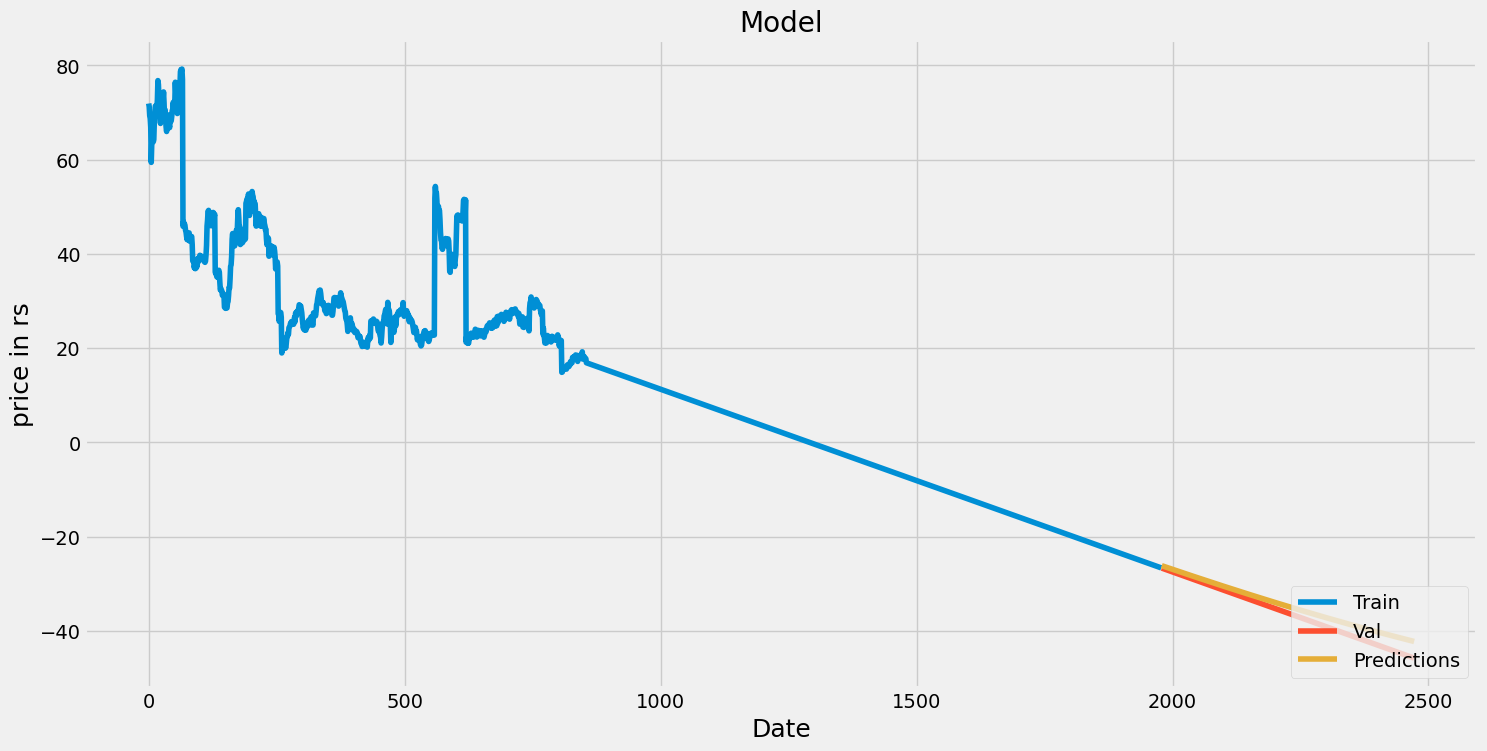

In [34]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('price in rs',fontsize=18)
plt.plot(train['PE'])
plt.plot(valid[['PE','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [35]:
PE = valid.iloc[-1,:-1].values
PE = PE.tolist()
PE_p = PE[0]
predict = valid.iloc[-1,1:].values
predict = predict.tolist()
predict_p = predict[0]

In [36]:
Error = (abs(predict_p - PE_p)/(PE_p))*100
print('The error rate between actual close and predicted close is ', Error)

The error rate between actual close and predicted close is  -7.729719541298409


In [37]:
pwd

'C:\\Users\\goelp\\Desktop\\SCIT Classroom material\\ASSIGNMENTS DONE BY ME\\Finance'

In [38]:
valid

,PE,Predictions
1979,-26.645133,-26.143492
1980,-26.683883,-26.180363
1981,-26.722633,-26.217224
1982,-26.761383,-26.254074
1983,-26.800133,-26.290913
...,...,...
2468,-45.593937,-42.102863
2469,-45.632687,-42.130348
2470,-45.671438,-42.157814
2471,-45.710188,-42.185253


In [39]:
valid.to_csv("C:\\Users\\goelp\\Desktop\\SCIT Classroom material\\ASSIGNMENTS DONE BY ME\\Finance\\DLF PE preds.csv",encoding='utf-8')